# Exploratory Data Analysis (EDA)

In [165]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from scipy.signal import find_peaks
from scipy.stats import gamma
import statsmodels.api as sm
import warnings
from datetime import datetime
import statsmodels.api as sm
import scipy.stats as stats

In [166]:
data = pd.read_csv("train_ML_IOT.csv")
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


## Organization of data

In [167]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


(           Junction      Vehicles            ID
 count  48120.000000  48120.000000  4.812000e+04
 mean       2.180549     22.791334  2.016330e+10
 std        0.966955     20.750063  5.944854e+06
 min        1.000000      1.000000  2.015110e+10
 25%        1.000000      9.000000  2.016042e+10
 50%        2.000000     15.000000  2.016093e+10
 75%        3.000000     29.000000  2.017023e+10
 max        4.000000    180.000000  2.017063e+10,
 None)

In [168]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Weekday'] = [datetime.weekday(date) for date in data.DateTime]
data['Year'] = [date.year for date in data.DateTime]
data['Month'] = [date.month for date in data.DateTime]
data['Day'] = [date.day for date in data.DateTime]
data['Hour'] = [date.hour for date in data.DateTime]
data['Week'] = [date.week for date in data.DateTime]
data['Quarter'] = [date.quarter for date in data.DateTime]
data["IsWeekend"] = data["Weekday"] >= 5

data.head(10)

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4,True
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,1,44,4,True
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,2,44,4,True
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,3,44,4,True
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,4,44,4,True
5,2015-11-01 05:00:00,1,6,20151101051,6,2015,11,1,5,44,4,True
6,2015-11-01 06:00:00,1,9,20151101061,6,2015,11,1,6,44,4,True
7,2015-11-01 07:00:00,1,8,20151101071,6,2015,11,1,7,44,4,True
8,2015-11-01 08:00:00,1,11,20151101081,6,2015,11,1,8,44,4,True
9,2015-11-01 09:00:00,1,12,20151101091,6,2015,11,1,9,44,4,True


### Missing Values

In [169]:
def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display((data.isnull().sum()).sum())
    
    if (data.isnull().sum()).sum() != 0 :
    
        for column in columns :

            # Fill Missing Values with Specific Value :
            if "Value_Fill" in fill_types :
                data[ column ] = data[ column ].fillna(fill_value)

            # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
            if "Forward_Fill" in fill_types :
                data[ column ] = data[ column ].ffill(axis = 0)

            # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
            if "Backward_Fill" in fill_types :
                data[ column ] = data[ column ].bfill(axis = 0)

        print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
        display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0

train = fill_missing_values(data, fill_value, fill_types, data.columns,"train")

Missing Values BEFORE REMOVAL in  train  data


0

In [170]:
data.isna().sum() # Null data amount

DateTime     0
Junction     0
Vehicles     0
ID           0
Weekday      0
Year         0
Month        0
Day          0
Hour         0
Week         0
Quarter      0
IsWeekend    0
dtype: int64

In [171]:
sns.set(rc={'figure.figsize':(18, 10)})

### Separating Junctions

In [172]:
junction_1 = data[data["Junction"]==1]
junction_2 = data[data["Junction"]==2]
junction_3 = data[data["Junction"]==3]
junction_4 = data[data["Junction"]==4]

junctions = [junction_1, junction_2, junction_3, junction_4]

### Statistical Values

In [173]:
i = 1
for junction in junctions:
    print("Junction",i,"\n")
    print("Std: ",junction['Vehicles'].std())
    print("Skewness: ",junction['Vehicles'].skew())
    print("Kurtosis: ",junction['Vehicles'].kurt(),"\n\n")
    print("Mean: ",junction['Vehicles'].mean())
    print("Median: ",junction['Vehicles'].median())
    print("Min: ",junction['Vehicles'].min())
    print("Max: ",junction['Vehicles'].max())
    i+=1

Junction 1 

Std:  23.0083451392927
Skewness:  0.8012975778113662
Kurtosis:  0.19188209363777453 


Mean:  45.05290570175438
Median:  40.0
Min:  5
Max:  156
Junction 2 

Std:  7.401306635266316
Skewness:  1.2873364898588882
Kurtosis:  1.783596555414265 


Mean:  14.253220942982455
Median:  13.0
Min:  1
Max:  48
Junction 3 

Std:  10.436005075710996
Skewness:  3.490206183724324
Kurtosis:  27.36437504960055 


Mean:  13.694010416666666
Median:  11.0
Min:  1
Max:  180
Junction 4 

Std:  3.5214545458330613
Skewness:  1.3326967458513121
Kurtosis:  4.737325243604408 


Mean:  7.251611418047882
Median:  7.0
Min:  1
Max:  36


### Trends of junctions 
Changes of traffic point over time

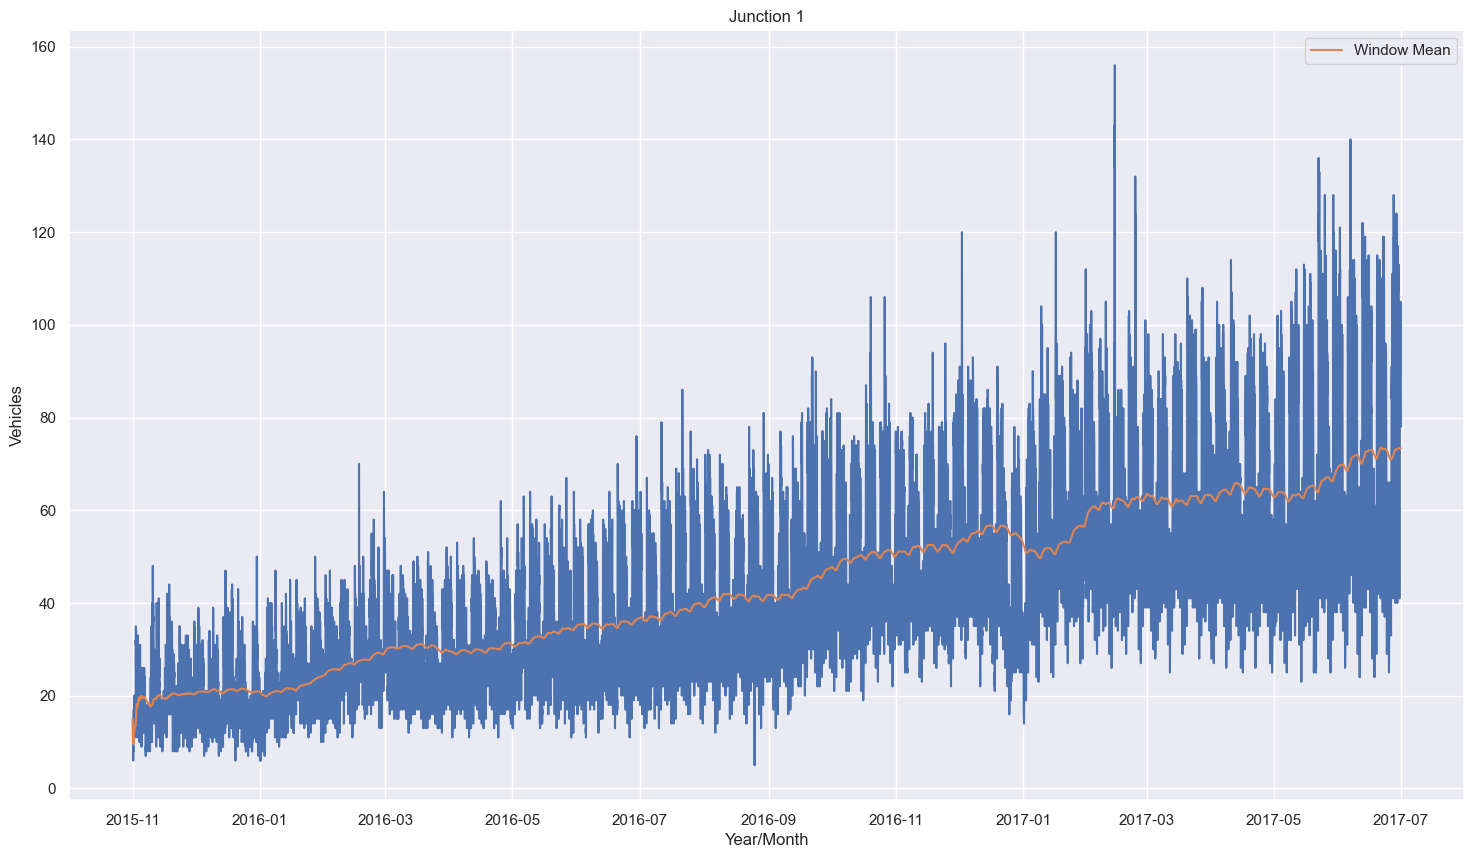

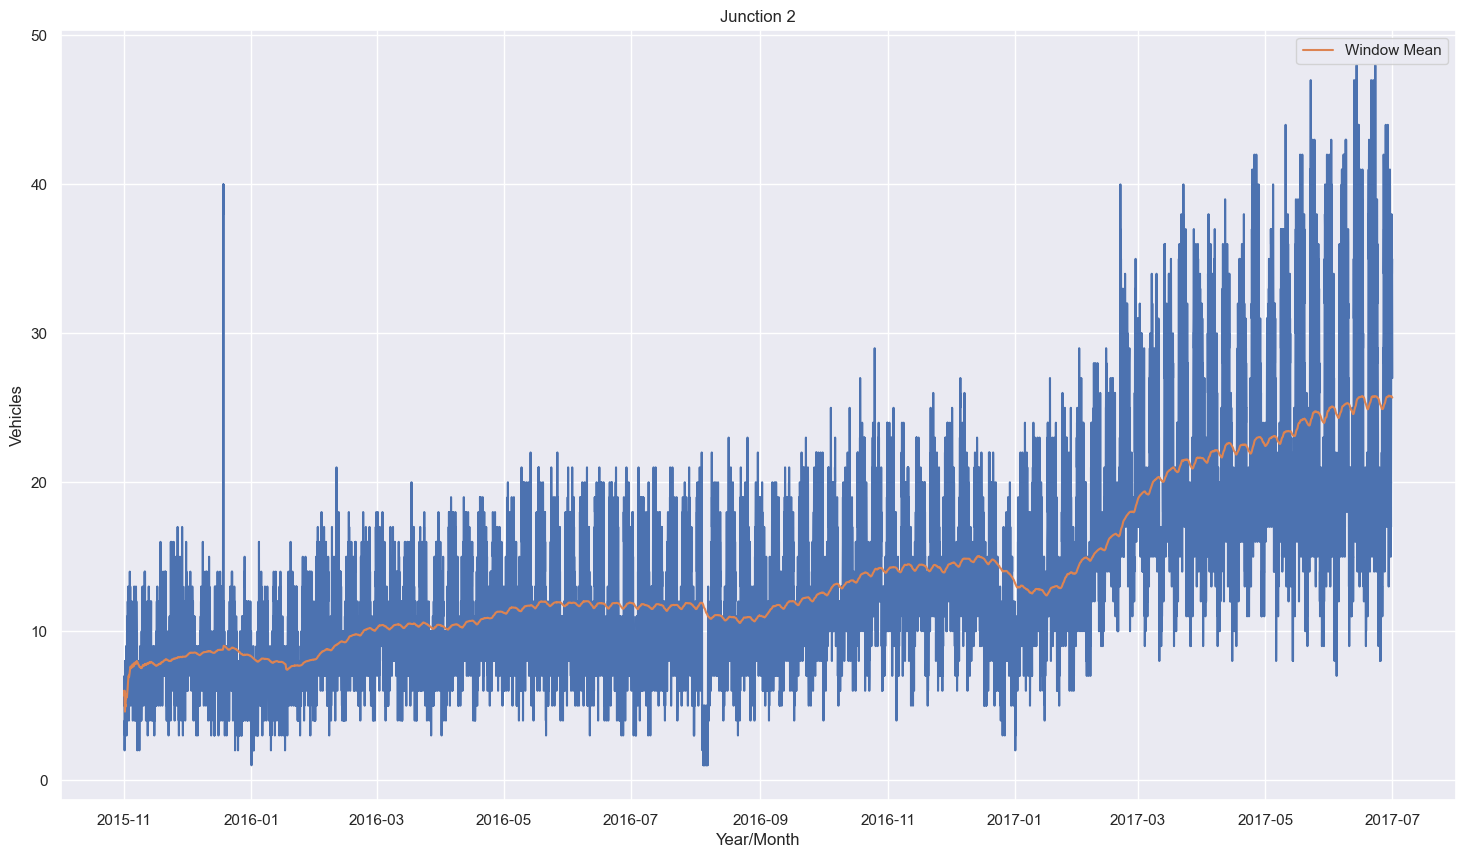

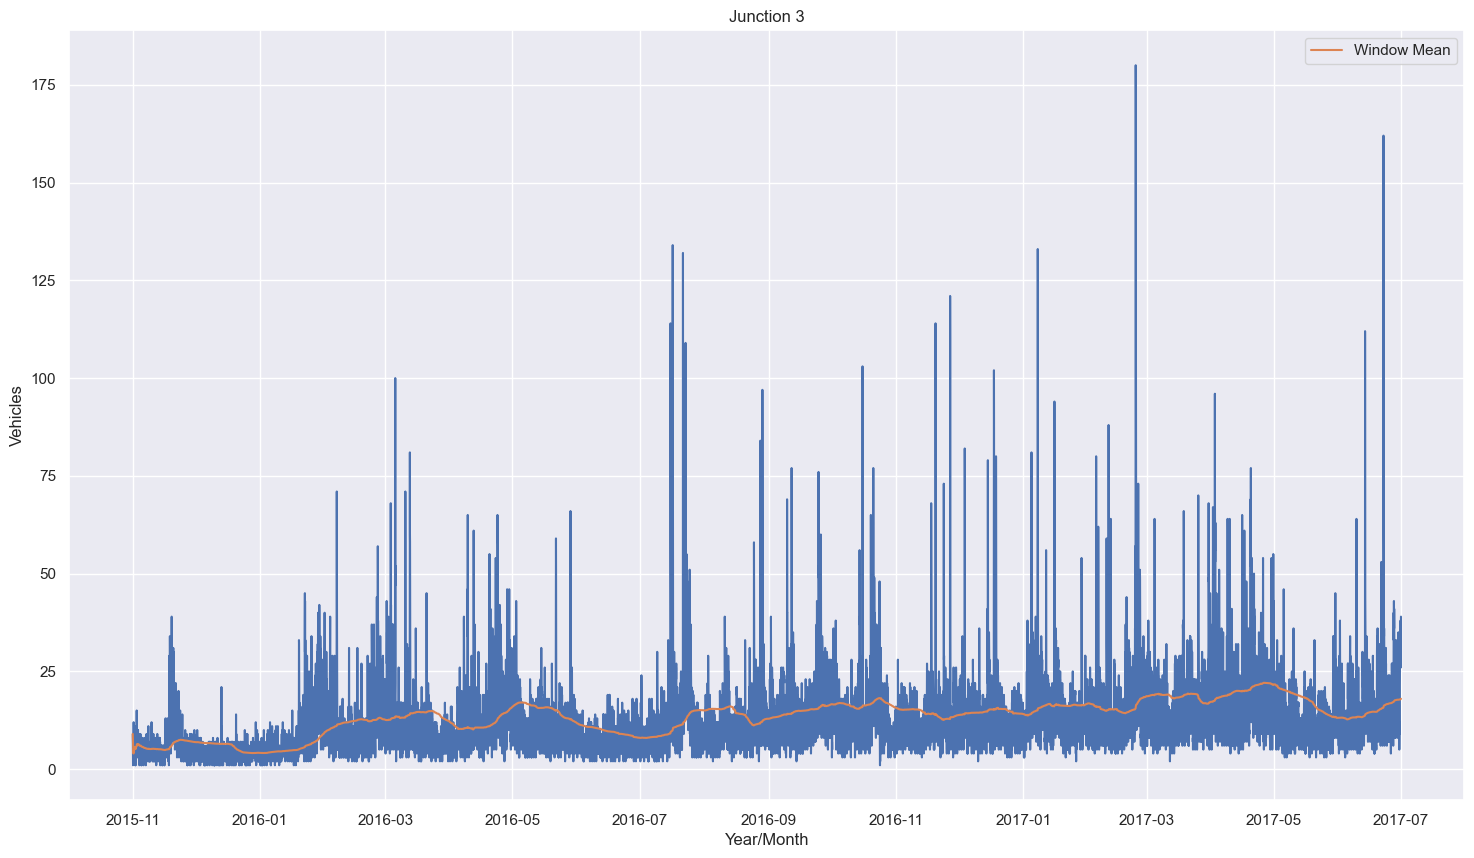

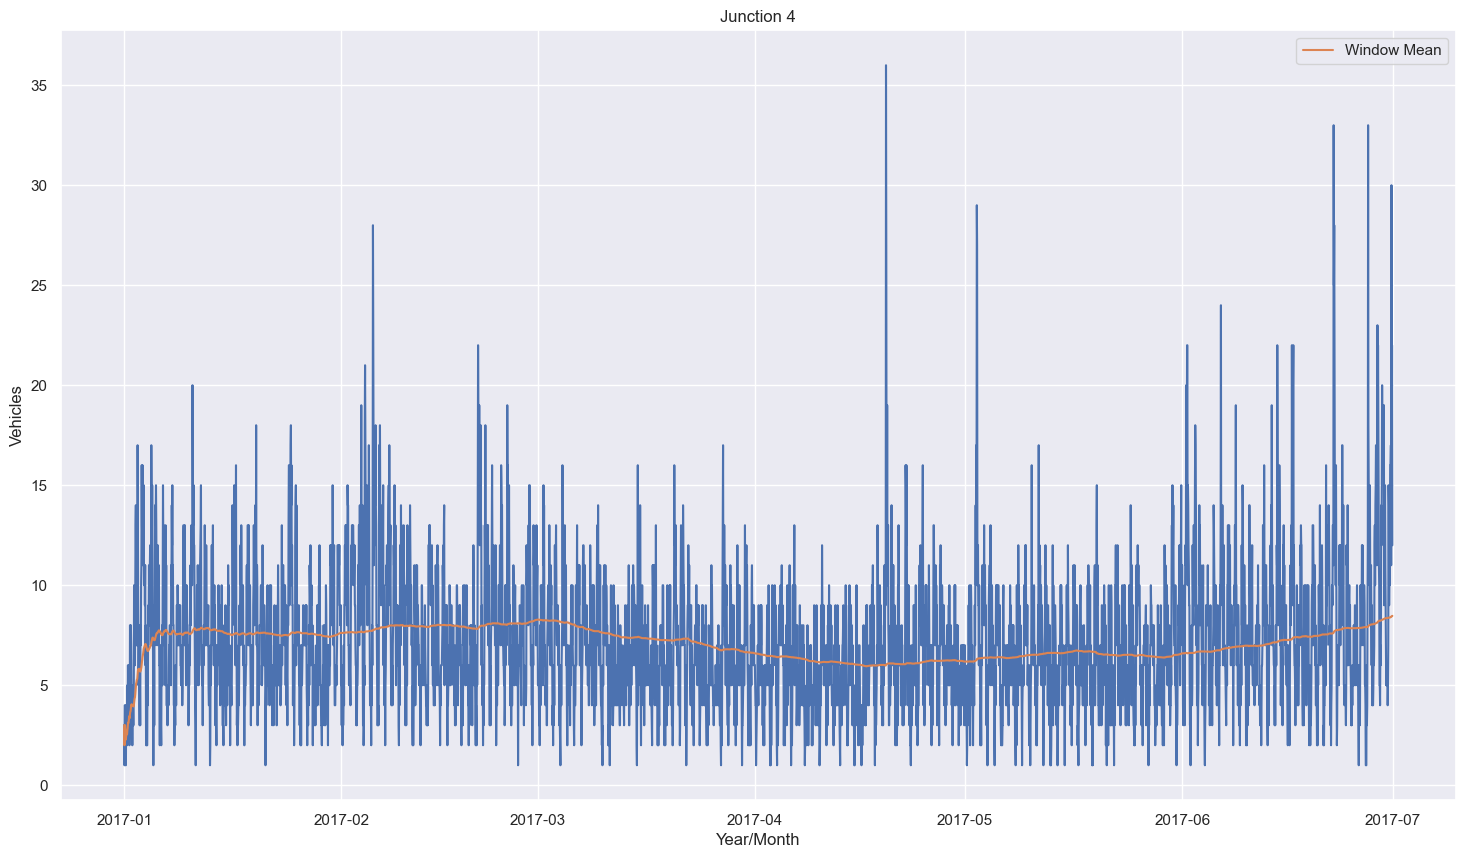

In [174]:
for index,junction in enumerate(junctions):
    plt.title('Junction %d' %(index+1))
    plt.plot(junction.DateTime, junction.Vehicles)
    plt.plot(junction.DateTime, junction.Vehicles.rolling(720, min_periods=1).mean(), label = "Window Mean")
    plt.xlabel("Year/Month")
    plt.ylabel("Vehicles")
    plt.legend()
    plt.show()

A time series is stationary if it does not have a trend or seasonality. However, in the EDA, I saw a weekly seasonality and an upwards trend over the years. In the above plot, it is again established that Junctions one and two have an upward trend. If we limit the span we will be able to further see the weekly seasonality. I will be spairing that step at this point and moving on with the respective transforms on datasets.


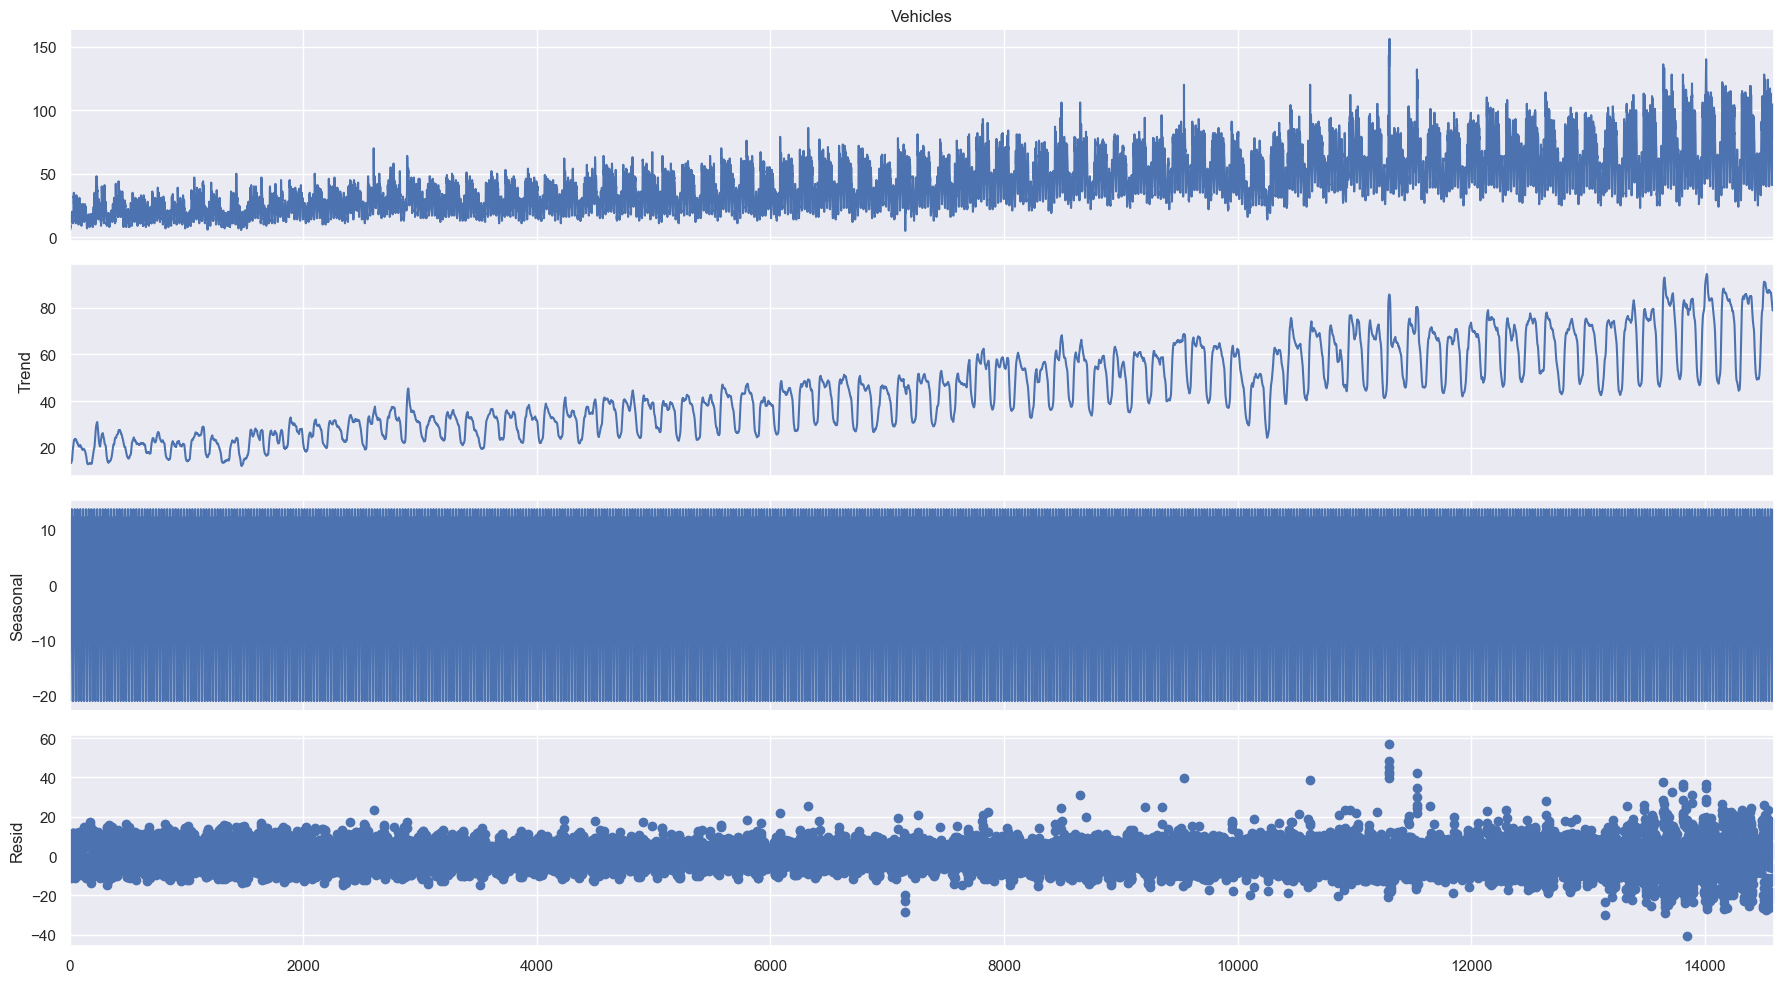

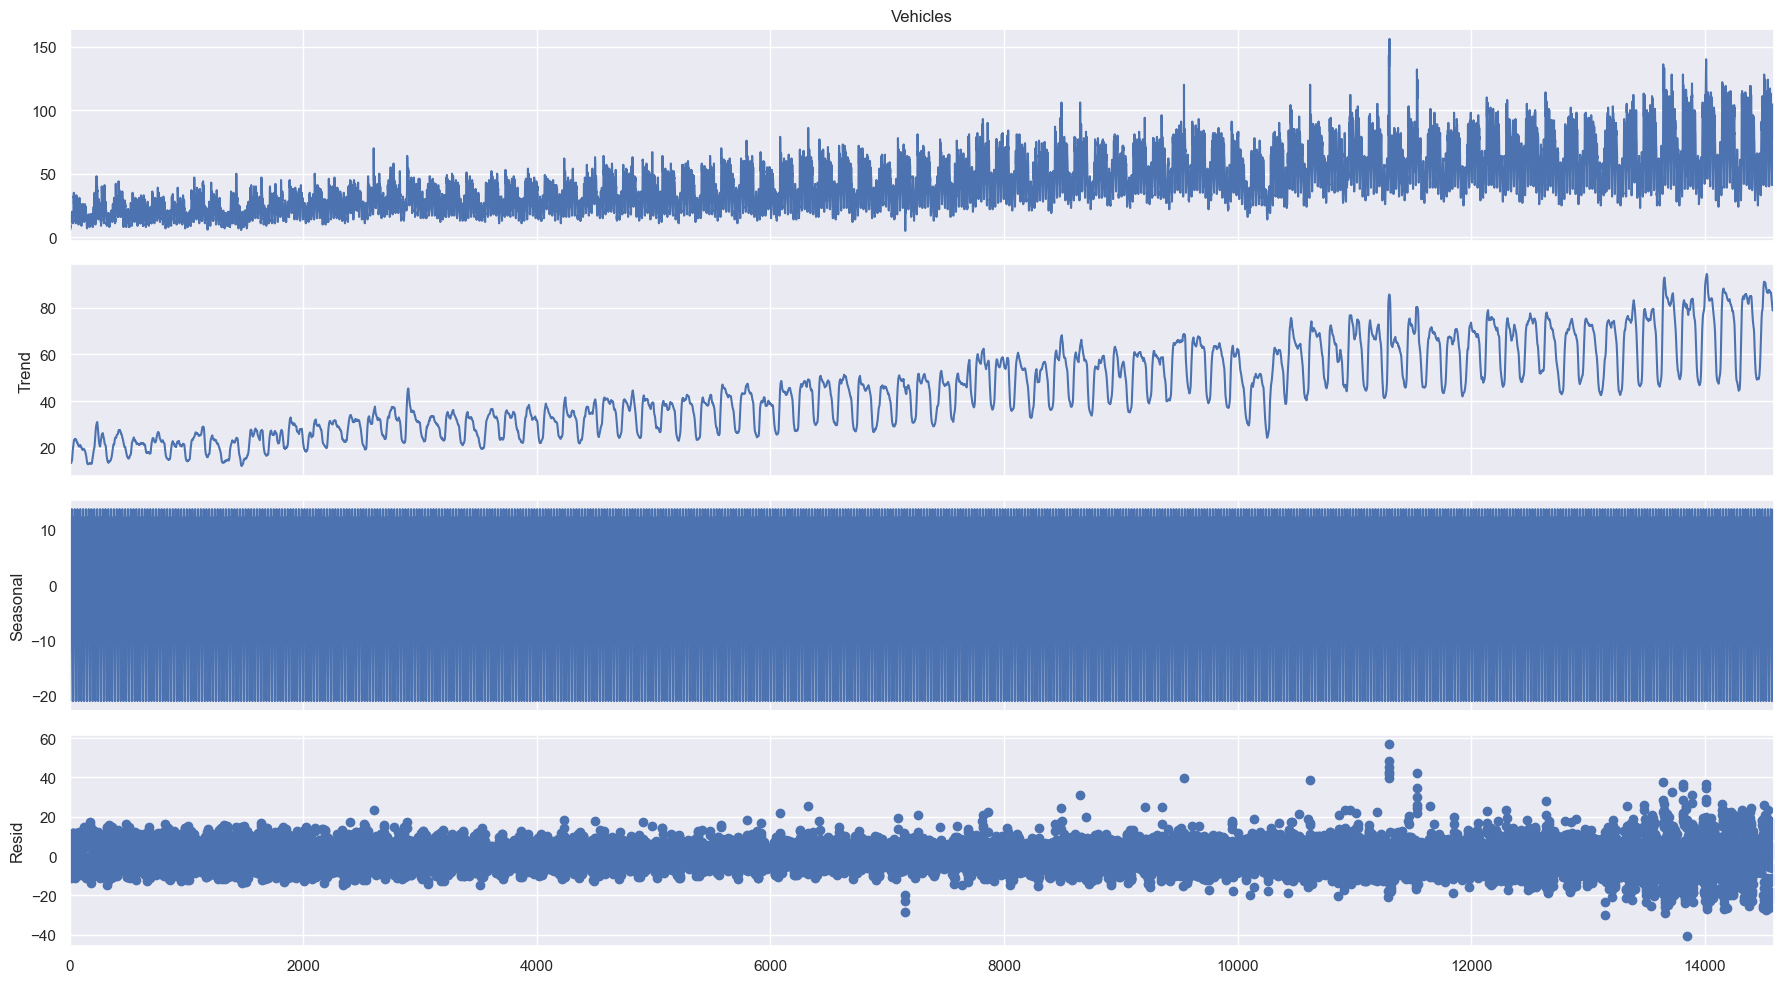

In [175]:
time_series_data = junction_1.Vehicles
result = sm.tsa.seasonal_decompose(time_series_data, model='additive', period=24)
result.plot()

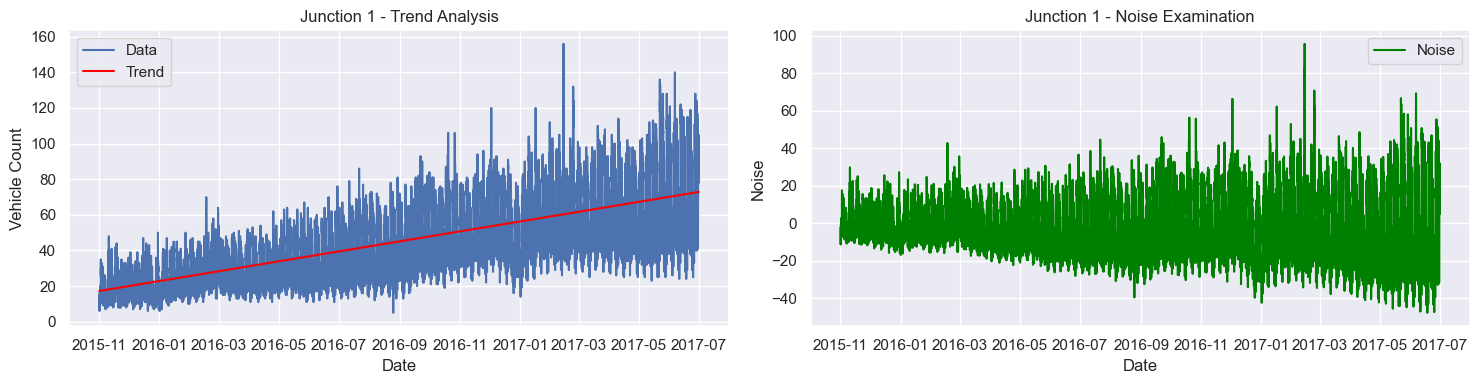

Junction 1 - Seasonal Mean: -0.011485126264292956
Junction 1 - Seasonal Standard Deviation: 11.768711286309003
Junction 1 - Trend Slope: 0.0038097546911437423
Junction 1 - Trend Intercept: 17.25884035251518
Junction 1 - Mean Noise: 3.470128667845928e-14
Junction 1 - Standard Deviation of Noise: 16.486631390087474


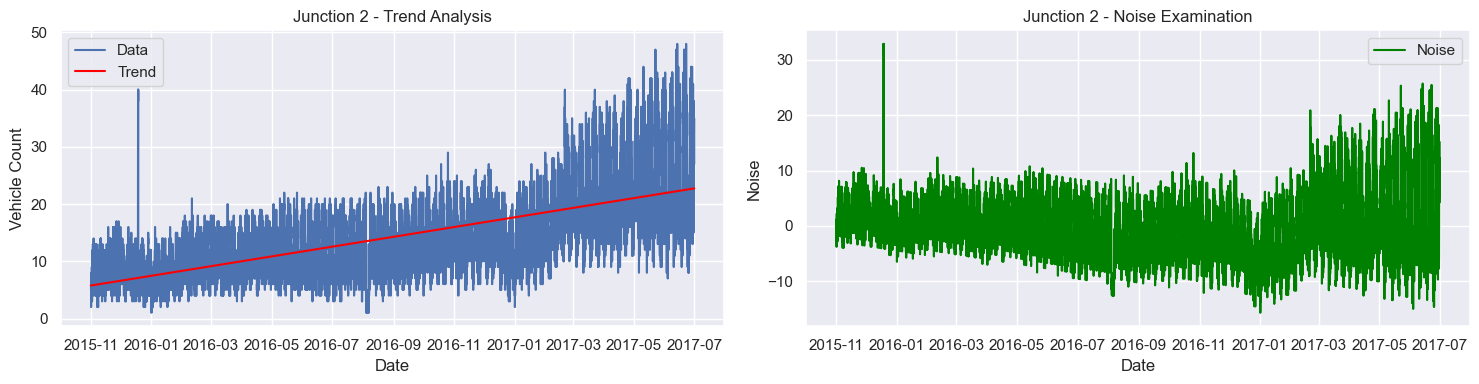

Junction 2 - Seasonal Mean: 0.005418854279004389
Junction 2 - Seasonal Standard Deviation: 2.940924401289598
Junction 2 - Trend Slope: 0.0011630210418028587
Junction 2 - Trend Intercept: 5.768400932509691
Junction 2 - Mean Noise: 9.099933282541634e-15
Junction 2 - Standard Deviation of Noise: 5.547513523900225


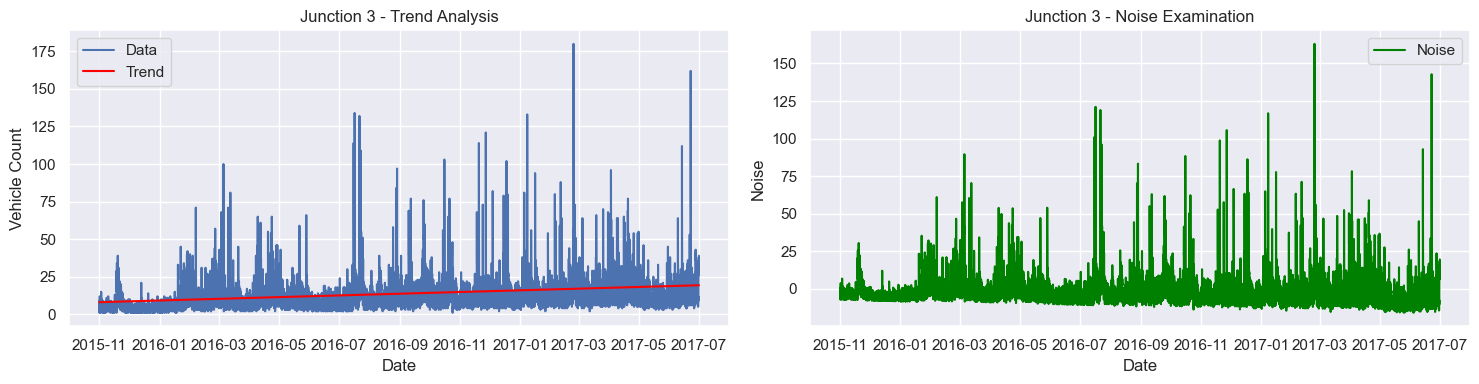

Junction 3 - Seasonal Mean: -0.10288614422958331
Junction 3 - Seasonal Standard Deviation: 6.525518378313682
Junction 3 - Trend Slope: 0.0007725622288921174
Junction 3 - Trend Intercept: 8.057782675784226
Junction 3 - Mean Noise: -1.994505924940632e-15
Junction 3 - Standard Deviation of Noise: 9.915254195083062


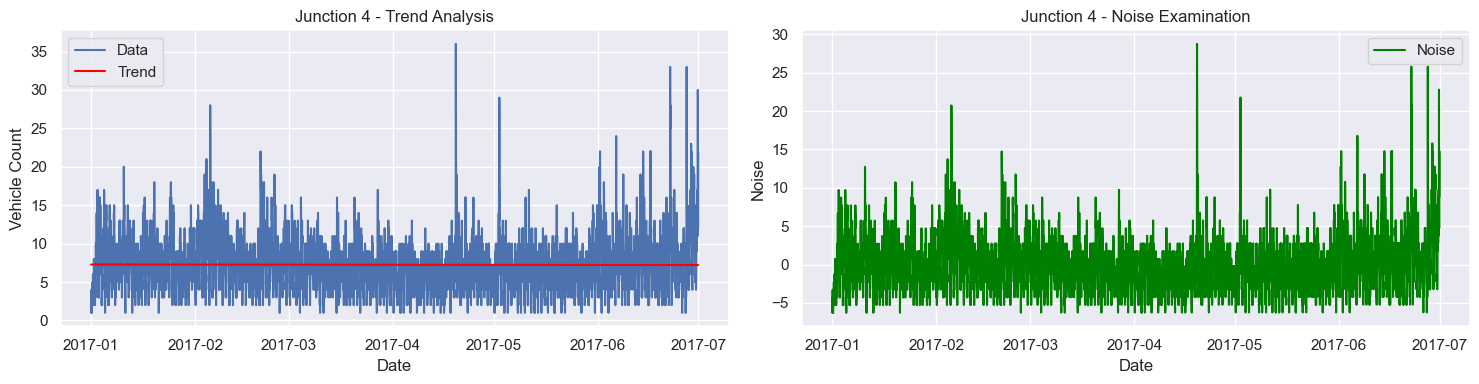

Junction 4 - Seasonal Mean: -0.00527349019554905
Junction 4 - Seasonal Standard Deviation: 3.047149307750716
Junction 4 - Trend Slope: -1.5700269074005267e-05
Junction 4 - Trend Intercept: 7.285704552342071
Junction 4 - Mean Noise: 1.3896802677296986e-14
Junction 4 - Standard Deviation of Noise: 3.5209941540547938


In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

junctions_tuple = data.groupby('Junction')

for junction_id, junction_data in junctions_tuple: # Trend analysis and noise examination for each junction
    # Sort the data
    junction_data['DateTime'] = pd.to_datetime(junction_data['DateTime'])
    junction_data = junction_data.sort_values(by='DateTime')
    
    x = np.arange(len(junction_data))
    x = sm.add_constant(x)
    model = sm.OLS(junction_data['Vehicles'], x).fit()
    trend_slope = model.params[1]
    trend_intercept = model.params[0]
    
    detrended_data = junction_data['Vehicles'] - (trend_slope * x[:, 1] + trend_intercept)
    
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(junction_data['DateTime'], junction_data['Vehicles'], label='Data')
    plt.plot(junction_data['DateTime'], trend_slope * x[:, 1] + trend_intercept, label='Trend', color='red')
    plt.xlabel('Date')
    plt.ylabel('Vehicle Count')
    plt.title(f'Junction {junction_id} - Trend Analysis')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(junction_data['DateTime'], detrended_data, label='Noise', color='green')
    plt.xlabel('Date')
    plt.ylabel('Noise')
    plt.title(f'Junction {junction_id} - Noise Examination')
    plt.legend()
    
    seasonal_period = 24*90
    decomposition = seasonal_decompose(junction_data['Vehicles'], period=seasonal_period)
    seasonal_component = decomposition.seasonal
    
    # plt.figure(figsize=(15, 4))
    # plt.plot(junction_data['DateTime'], seasonal_component, label='Seasonal Component', color='blue')
    # plt.xlabel('Date')
    # plt.ylabel('Seasonal Component')
    # plt.title(f'Junction {junction_id} - Seasonal Component Analysis')
    # plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    seasonal_mean = np.mean(seasonal_component)
    seasonal_std = np.std(seasonal_component)
    print(f'Junction {junction_id} - Seasonal Mean: {seasonal_mean}')
    print(f'Junction {junction_id} - Seasonal Standard Deviation: {seasonal_std}')
    
    mean_noise = np.mean(detrended_data)
    std_noise = np.std(detrended_data)
    print(f'Junction {junction_id} - Trend Slope: {trend_slope}')
    print(f'Junction {junction_id} - Trend Intercept: {trend_intercept}')
    print(f'Junction {junction_id} - Mean Noise: {mean_noise}')
    print(f'Junction {junction_id} - Standard Deviation of Noise: {std_noise}')

Junction 2 - Trend Slope: This value expresses the slope of the trend calculated for Junction 2. The trend slope determines the long-term change of the time series. A positive slope indicates that the number of vehicles is increasing over time, while a negative slope indicates that it is decreasing. This value is approximately 0.0012, which seems to indicate that the number of vehicles in Junction 2 is trending towards a slow increase.

Junction 2 - Trend Intercept: This value represents the starting point of the trend calculated for Junction 2. The trend starting point represents the value at which the time series begins. This value is approximately 5.7684, indicating the starting value from which the time series begins.

Junction 2 - Mean Noise: This value represents the statistically calculated average of the noise calculated for Junction 2. Noise represents unpredictable fluctuations. Its mean value is very close to approximately 0, indicating that the noise is close to the center of the data.

Junction 2 - Standard Deviation of Noise: This value expresses the standard deviation of the noise calculated for Junction 2. Standard deviation measures how variable the data is. This value is approximately 5.5475, indicating that noise has a certain degree of variability over the data.

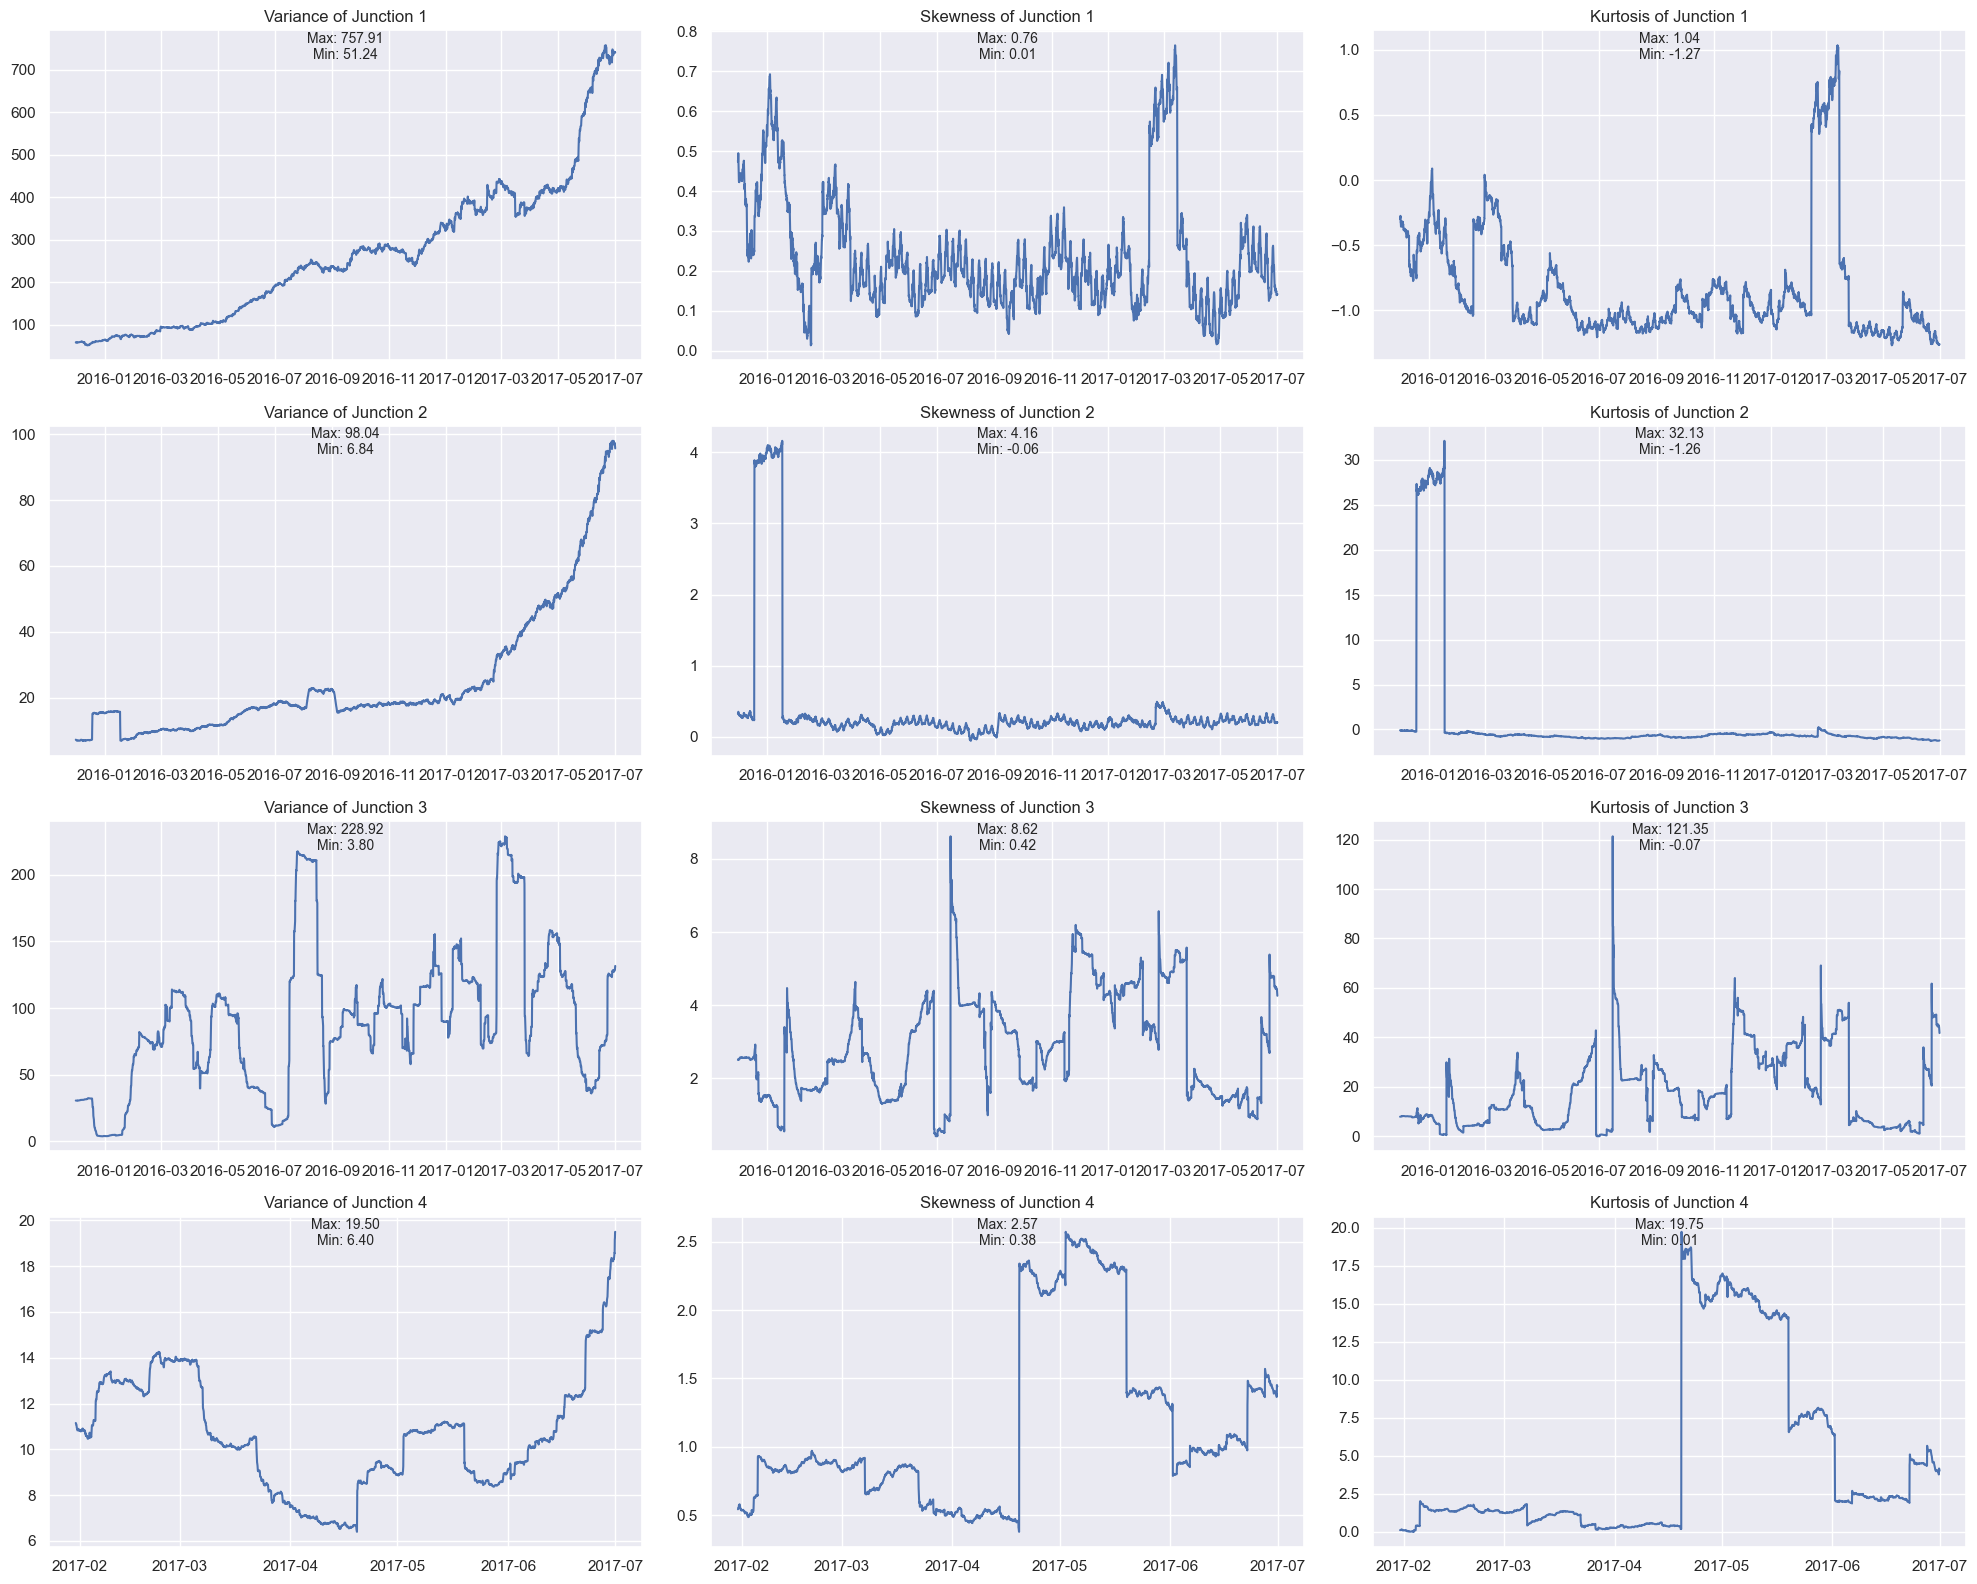

In [177]:
sns.set(rc={'figure.figsize':(20, 16)})
fig, axs = plt.subplots(4, 3)
for i, j in enumerate(junctions):
    
    variance_values = j.Vehicles.rolling(720).var()
    axs[i, 0].plot(j.DateTime, variance_values)
    axs[i, 0].title.set_text("Variance of Junction %d" % (i+1))
    axs[i, 0].annotate(f"Max: {variance_values.max():.2f}\nMin: {variance_values.min():.2f}", xy=(0.5, 0.95), xycoords='axes fraction',
            fontsize=10, ha='center', va='center')
    
    skewness_values = j.Vehicles.rolling(720).skew()
    axs[i, 1].plot(j.DateTime, skewness_values)
    axs[i, 1].title.set_text("Skewness of Junction %d" % (i+1))
    axs[i, 1].annotate(f"Max: {skewness_values.max():.2f}\nMin: {skewness_values.min():.2f}", xy=(0.5, 0.95), xycoords='axes fraction',
            fontsize=10, ha='center', va='center')
    
    kurtosis_values = j.Vehicles.rolling(720).kurt()
    axs[i, 2].plot(j.DateTime, kurtosis_values)
    axs[i, 2].title.set_text("Kurtosis of Junction %d" % (i+1))
    axs[i, 2].annotate(f"Max: {kurtosis_values.max():.2f}\nMin: {kurtosis_values.min():.2f}", xy=(0.5, 0.95), xycoords='axes fraction',
            fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()

Variance: Calculates the 720-hour rolling variance of the number of vehicles data for each intersection. Variance measures how spread out and fluctuation the data is.

Skewness: Calculates the 720-hour moving skewness of the vehicle count data for each intersection. Skewness indicates whether the distribution of the data is symmetrical. Positive skewness is rightward skewed (extending to the right), while negative skewness is leftward skewed (extending to the left).

Kurtosis (Kurtosis): Calculates the 720 hour moving kurtosis (kurtosis) value of the vehicle count data for each intersection. Kurtosis measures how pointed or flattened the peaks and troughs of the data are. A normal distribution has a kurtosis value of 3.


For Junction 1:

Max Variance (Max Variance): 757 - This is the highest value of the 720 hour moving variance of the vehicle count data in Junction 1. This shows how volatile the data has been over this period.
Min Variance: 51.24 - This is the lowest value of the 720 hour moving variance of the vehicle count data at Junction 1. This shows how stable or low volatility the data has been over this period.
Max Skewness: 0.76 - This is the highest value of 720 hours of rolling skewness of vehicle count data at Junction 1. This value indicates that the distribution of the data in this period is right skewed (running to the right).
Min Skewness: 0.01 - This is the lowest value of 720 hours of rolling skewness of vehicle count data at Junction 1. This value indicates that the data is more symmetrical during this period.
Max Kurtosis: Not Specified - Failure to specify maximum and minimum values in addition to Kurtosis values may indicate that you need to examine this feature in more detail.

For Junction 3:

Max Variance (Max Variance): 228 - This is the highest value of the 720 hour moving variance of the vehicle count data in Junction 3. This shows how volatile the data has been over this period.
Min Variance: 3.80 - This is the lowest value of the 720 hour moving variance of the vehicle count data in Junction 3. This shows how stable or low volatility the data has been over this period.
Max Skewness: 8.62 - This is the highest value of 720 hours of rolling skewness of vehicle count data at Junction 3. This value indicates that the distribution of the data for this period is too skewed to the right.
Min Skewness: 0.42 - This is the lowest value of 720 hours of rolling skewness of vehicle count data at Junction 3. This value indicates that the data is more symmetrical during this period.
Max Kurtosis (Max Kurtosis): 122 - This is the highest value of 720 hours of moving kurtosis of vehicle count data at Junction 3. This indicates that the peaks and troughs of the data were very sharp during this period.
Min Kurtosis (Min Kurtosis): -0.07 - This is the lowest value of 720 hours of moving kurtosis of vehicle count data at Junction 3. This value indicates that the data is more flattened in this period.

C:\Users\Stajyer\AppData\Local\Temp\ipykernel_14668\2604960882.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




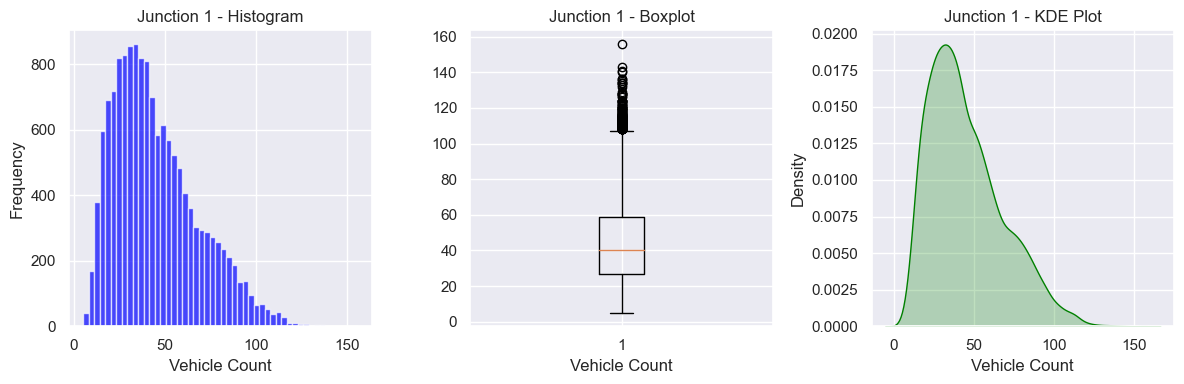

Junction 1 - Varyans: 529.38
Junction 1 - Skewness: 0.80
Junction 1 - Kurtosis: 3.19
----------------------------------------


C:\Users\Stajyer\AppData\Local\Temp\ipykernel_14668\2604960882.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




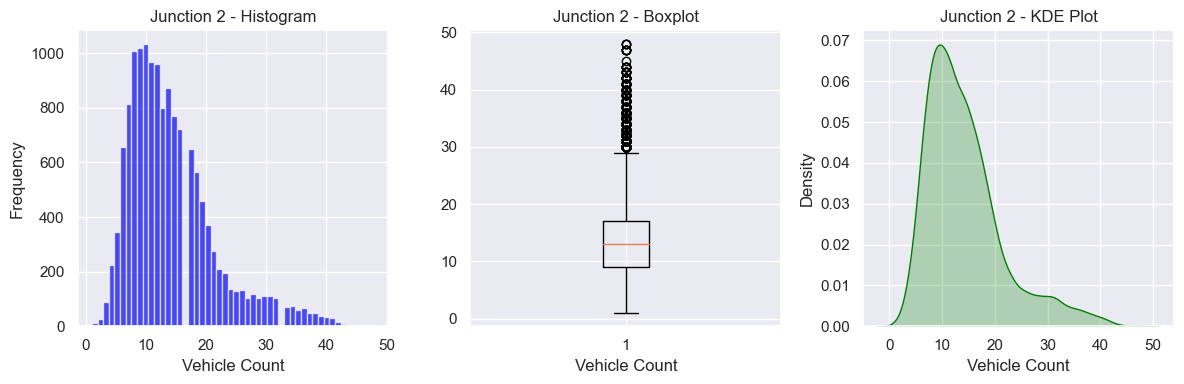

Junction 2 - Varyans: 54.78
Junction 2 - Skewness: 1.29
Junction 2 - Kurtosis: 4.78
----------------------------------------


C:\Users\Stajyer\AppData\Local\Temp\ipykernel_14668\2604960882.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




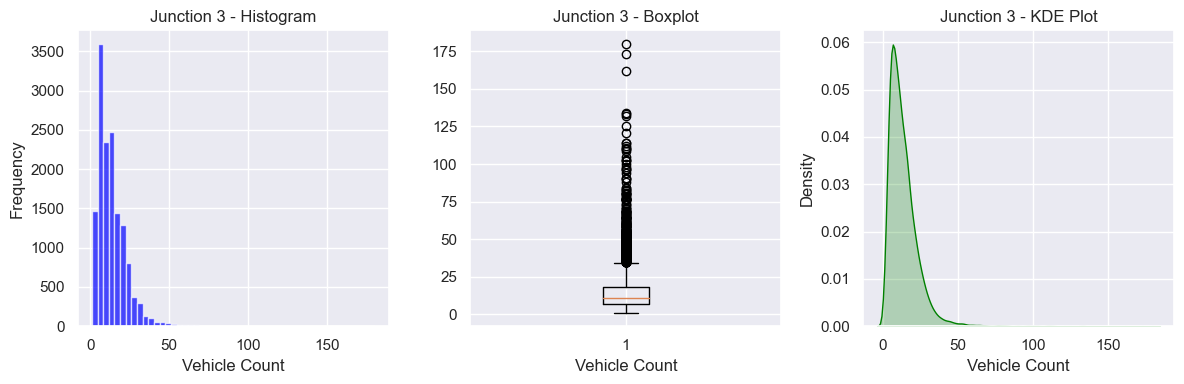

Junction 3 - Varyans: 108.91
Junction 3 - Skewness: 3.49
Junction 3 - Kurtosis: 30.35
----------------------------------------


C:\Users\Stajyer\AppData\Local\Temp\ipykernel_14668\2604960882.py:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




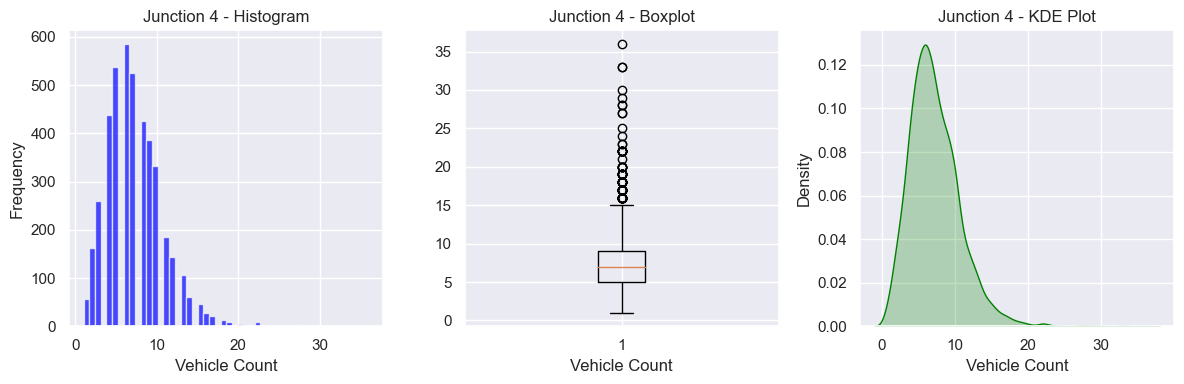

Junction 4 - Varyans: 12.40
Junction 4 - Skewness: 1.33
Junction 4 - Kurtosis: 7.73
----------------------------------------


In [178]:
from scipy.stats import skew, kurtosis
junctions_groupby = data.groupby('Junction')

for junction_id, junction_data in junctions_groupby:
    variance = junction_data['Vehicles'].var()
    skewness = skew(junction_data['Vehicles'])
    kurt = kurtosis(junction_data['Vehicles'], fisher=False)  # Fisher's Kurtosis kullanılmıyor
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.hist(junction_data['Vehicles'], bins=50, color='blue', alpha=0.7)
    plt.xlabel('Vehicle Count')
    plt.ylabel('Frequency')
    plt.title(f'Junction {junction_id} - Histogram')
    
    plt.subplot(1, 3, 2)
    plt.boxplot(junction_data['Vehicles'])
    plt.xlabel('Vehicle Count')
    plt.title(f'Junction {junction_id} - Boxplot')
    
    plt.subplot(1, 3, 3)
    sns.kdeplot(junction_data['Vehicles'], shade=True, color='green')
    plt.xlabel('Vehicle Count')
    plt.ylabel('Density')
    plt.title(f'Junction {junction_id} - KDE Plot')
    
    plt.tight_layout()
    plt.show()
    
    print(f'Junction {junction_id} - Varyans: {variance:.2f}')
    print(f'Junction {junction_id} - Skewness: {skewness:.2f}')
    print(f'Junction {junction_id} - Kurtosis: {kurt:.2f}')
    print('-' * 40)

Low kurtosis indicates that the data is distributed more centrally, whereas high kurtosis indicates that the data contains more extreme values at the tails, making the distribution more pronounced. Variance: Variance is a statistical measure that quantifies how much data points deviate from the mean. A larger variance means that data points deviate more from the mean, indicating a wider distribution. For example, let's consider students' math scores in a class: Student A: [90, 92, 91, 89, 88] Student B: [70, 100, 71, 69, 72] Although both students have the same average score of 90, Student B has more variable scores and a larger variance because the scores are more dispersed. Skewness: Skewness measures the symmetry of a data distribution. Positive skewness indicates that the data is skewed to the right, while negative skewness indicates that the data is skewed to the left. For instance, let's examine an income distribution: Distribution A: More low-income individuals with a few high-income individuals Distribution B: More high-income individuals with a few low-income individuals Distribution A exhibits positive skewness (skewed to the right), while Distribution B displays negative skewness (skewed to the left).

If grades in a class are distributed closely around the mean, the standard deviation and variance are low. On the other hand, if grades are widely dispersed from the mean in another class, the standard deviation and variance are high.

Tail density (kurtosis) is a statistical term that refers to the density and shape of the tails (extreme values) of a data distribution. Higher kurtosis values indicate that the data is more concentrated at the extremes and the tails are more pronounced.

Tails are the extreme points of a data distribution and usually contain values that are far from the data set's mean or are considered outliers. These tails become more dense or sparse as they move away from the central region of the data set. The kurtosis value measures how distributed these tails are and how pointed or flat they are.

The term "tail" refers to the extreme ends of a data distribution, encompassing values that are distant from the central tendency of the data. Tails typically include values that are rare and lie far away from the central region of the data distribution, often considered as outliers.

Let's provide a more detailed explanation of the statistics calculated for Junction 1:
Variance): Variance is a statistical measure that quantifies how much data points deviate from the mean. The calculated variance of 529.38 for Junction 1 indicates that the vehicle count data at this junction exhibits significant deviation from the mean. In other words, vehicle counts at this junction often vary from the mean, either being larger or smaller.

Skewness: Skewness measures the symmetry of a data distribution. The positive skewness value of 0.80 calculated for Junction 1 suggests that the distribution of vehicle counts is skewed to the right. This means that there are long tails on the right side of the distribution, indicating that in some time periods, more vehicle counts are recorded, resulting in a rightward skew.

Kurtosis: Kurtosis measures the tail density and shape of a data distribution. The kurtosis value of 3.19 calculated for Junction 1 indicates that the data has lower kurtosis compared to a normal distribution. This suggests that there is lower density in the tails of the distribution, and the tails are flatter compared to a normal distribution. Since it deviates from the Fisher's Kurtosis value of 3, it implies that the distribution has lower tails.

The term "positive skewness" refers to a data distribution that is skewed to the right. A right-skewed distribution means that there are more data points on the right side of the distribution, resulting in a long right tail. This is often associated with a distribution that is shifted to the right, with more outliers or extreme values on the right side. For example, income distribution data is often right-skewed, as there are fewer individuals with very high incomes, but more with lower incomes. This is an example of positive skewness.

Let's provide a more detailed explanation of the statistics calculated for Junction 3:

Variance : Variance is a statistical measure that quantifies how much data points deviate from the mean. The calculated variance of 108.91 for Junction 3 indicates that the vehicle count data at this junction exhibits significant deviation from the mean. In other words, vehicle counts at this junction often vary from the mean, either being larger or smaller.

Skewness (Çarpıklık): Skewness measures the symmetry of a data distribution. The positive skewness value of 3.49 calculated for Junction 3 suggests that the distribution of vehicle counts is strongly skewed to the right. This means that there are long tails on the right side of the distribution, indicating that in some time periods, significantly more vehicle counts are recorded, resulting in a pronounced rightward skew.

Kurtosis: Kurtosis measures the tail density and shape of a data distribution. The kurtosis value of 30.35 calculated for Junction 3 indicates that the data has much higher kurtosis compared to a normal distribution. This suggests that there is much higher density in the tails of the distribution, and the tails are significantly more pronounced compared to a normal distribution. Since it deviates significantly from the Fisher's Kurtosis value of 3, it implies that the distribution is extremely heavy-tailed.

The term "positive skewness" refers to a data distribution that is skewed to the right. A right-skewed distribution means that there are more data points on the right side of the distribution, resulting in a long right tail. This is often associated with a distribution that is shifted to the right, with significantly more outliers or extreme values on the right side. In the case of Junction 3, it indicates that there are time periods where a significantly higher number of vehicle counts are recorded, leading to a pronounced rightward skew in the data distribution.

A high variance indicates that data points deviate significantly from the mean, resulting in a wider data distribution. Therefore, a variance value of 529.38 for Junction 1 signifies that the data points exhibit larger deviations from the mean and have a wider distribution. Conversely, the variance value of 12.40 for Junction 4 indicates lower deviation and a more tightly clustered distribution.

The variance value illustrates the variability in the data distribution, and different variance values represent varying degrees of variability or deviation. In other words, while data in Junction 1 appears to be more variable and has a broader range compared to Junction 4, data in Junction 4 displays lower variability and a more concentrated range.

Kurtosis value measures the tail density and shape of a data distribution. A kurtosis value of 3.19 for Junction 1 indicates that the data deviates less from a normal distribution. This suggests that the Junction 1 dataset has lower density in the tails and the tails are flatter compared to a normal distribution. This distribution contains fewer outliers, and data points in the tails have lower density.

On the other hand, a kurtosis value of 30.35 for Junction 3 indicates that the data deviates significantly from a normal distribution. This suggests that the Junction 3 dataset has much higher density in the tails, and the tails are much more pronounced compared to a normal distribution. This distribution contains more outliers, and data points in the tails have higher density.

This difference is related to the nature of the data sets in Junction 1 and Junction 3. Junction 1 data follows a more typical distribution, while Junction 3 data is more focused and has a much higher density in the tails. This highlights that traffic data from two different junctions can exhibit varying characteristics, leading to different kurtosis values in the analyzed data.

In [179]:
junction_1

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4,True
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,1,44,4,True
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,2,44,4,True
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,3,44,4,True
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,4,44,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...
14587,2017-06-30 19:00:00,1,105,20170630191,4,2017,6,30,19,26,2,False
14588,2017-06-30 20:00:00,1,96,20170630201,4,2017,6,30,20,26,2,False
14589,2017-06-30 21:00:00,1,90,20170630211,4,2017,6,30,21,26,2,False
14590,2017-06-30 22:00:00,1,84,20170630221,4,2017,6,30,22,26,2,False


In [180]:
# For Junction 1
b1 = junction_1.groupby(["Month", "Quarter"])["Vehicles"].sum().reset_index()
b1["Junction"] = 1

# For Junction 2
b2 = junction_2.groupby(["Month", "Quarter"])["Vehicles"].sum().reset_index()
b2["Junction"] = 2

# For Junction 3
b3 = junction_3.groupby(["Month", "Quarter"])["Vehicles"].sum().reset_index()
b3["Junction"] = 3

# For Junction 4
b4 = junction_4.groupby(["Month", "Quarter"])["Vehicles"].sum().reset_index()
b4["Junction"] = 4

In [181]:
bubble = pd.concat([b1, b2, b3, b4], axis=0)
bubble.reset_index(drop = True)

,Month,Quarter,Vehicles,Junction
0,1,1,61379,1
1,2,1,62929,1
2,3,1,69326,1
3,4,2,67486,1
4,5,2,77227,1
5,6,2,79314,1
6,7,3,29111,1
7,8,3,31185,1
8,9,3,34374,1
9,10,4,37224,1


In [182]:
fig = px.scatter(bubble, x="Month", y="Quarter", size="Vehicles", color="Junction",
                 hover_name="Junction", log_x=True, size_max=60)
fig.show()

These codes visually represent how the total number of vehicles varies across different months and quarters for each intersection, making it easier to compare and analyze. The size of the bubbles represents the total number of vehicles, and the color of the bubbles represents the intersection number. The x-axis represents the months, and the y-axis represents the quarters. The bubbles are plotted on a logarithmic scale on the x-axis to make the data more readable.

Calculates the autocorrelation of the number of vehicles at each intersection and plots the autocorrelation graph.

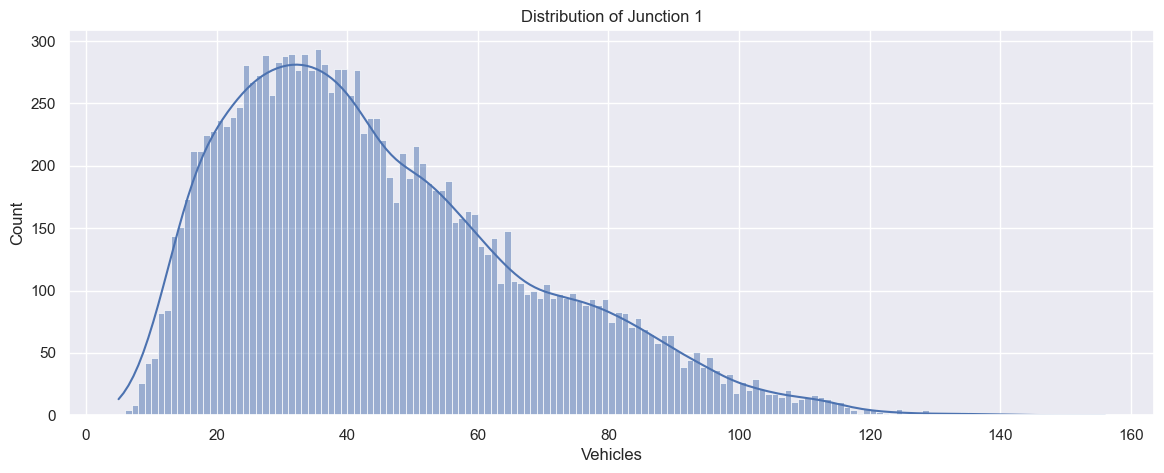

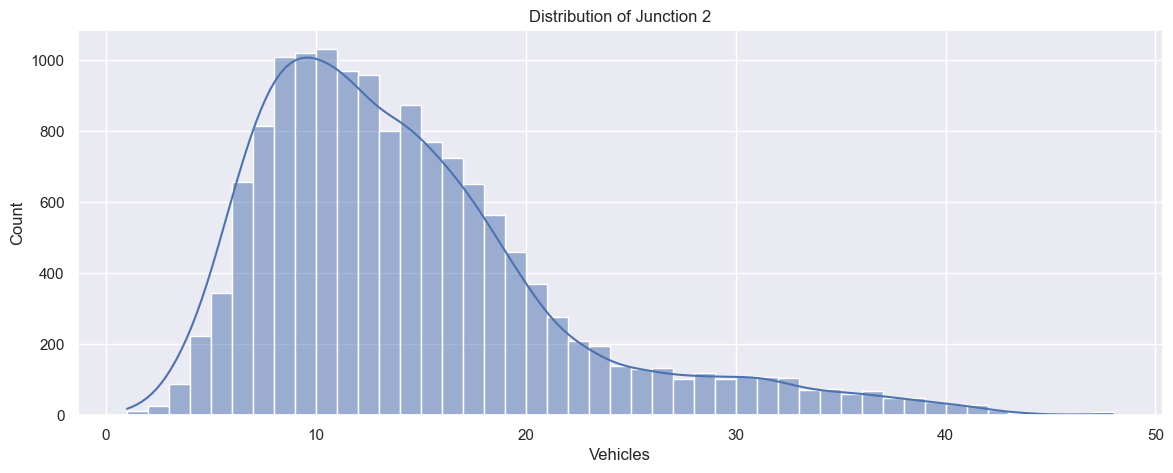

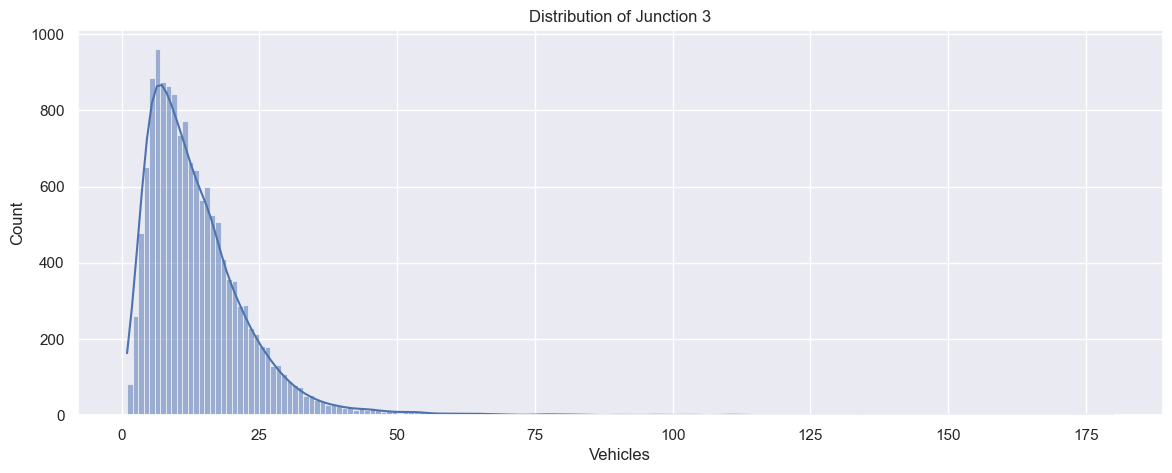

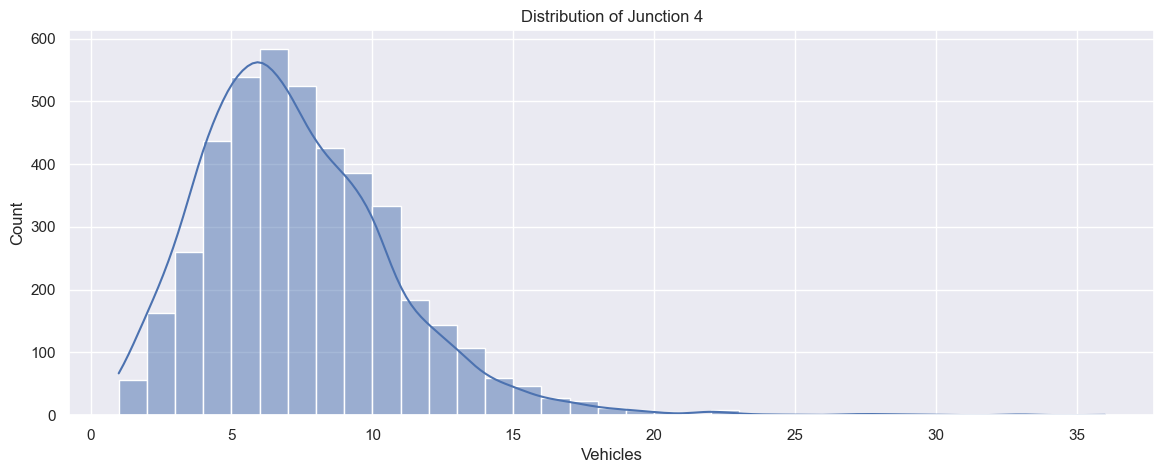

In [183]:
for i,j in enumerate(junctions):
    sns.set(rc={'figure.figsize':(14,5)})
    sns.histplot(j.Vehicles,binwidth=1,kde=True).set(title="Distribution of Junction %d" %(i+1))
    plt.show()

Plots the distribution of the number of vehicles at each intersection as a histogram (frequency distribution graph).

Junction # 1
weekday vehicle mean 49.76685823754789
weekend vehicle mean 33.19990366088632

Junction # 2
weekday vehicle mean 15.834291187739463
weekend vehicle mean 10.277697495183045

Junction # 3
weekday vehicle mean 13.793199233716475
weekend vehicle mean 13.44460500963391

Junction # 4
weekday vehicle mean 7.648397435897436
weekend vehicle mean 6.240196078431373


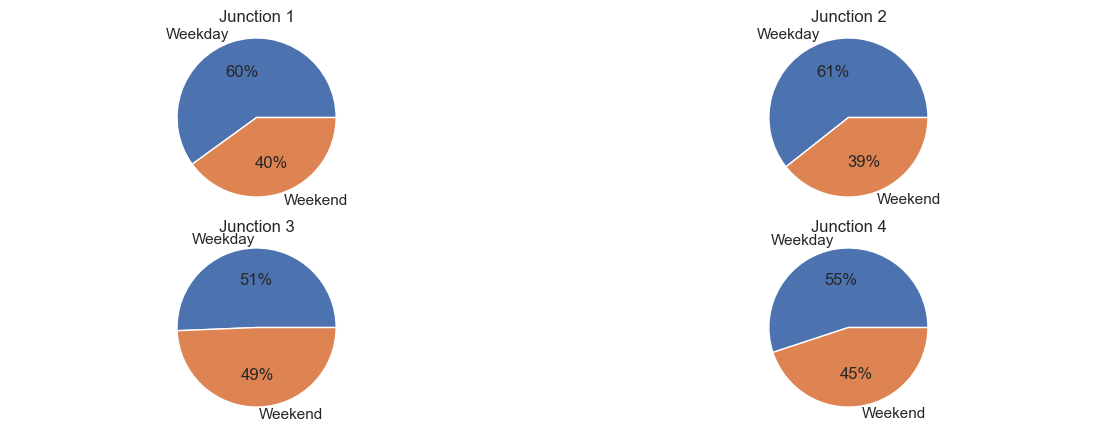

In [184]:
fig, axs = plt.subplots(2,2)
for i,j in enumerate(junctions):
    print("Junction #", i+1)
    weekday = j[j["Weekday"] < 5].Vehicles.mean()
    weekend = j[j["Weekday"] >= 5].Vehicles.mean()
    
    labels = ['Weekday', 'Weekend']
    sizes = [weekday, weekend]
    
    axs[int(i>=2),i%2].pie(sizes, labels=labels, autopct='%1.0f%%')
    axs[int(i>=2),i%2].axis('equal')
    axs[int(i>=2),i%2].title.set_text("Junction %d" %(i+1))
    #plt.show()
    
    print("weekday vehicle mean",j[j["Weekday"] < 5].Vehicles.mean())
    print("weekend vehicle mean", j[j["Weekday"] >= 5].Vehicles.mean())
    
    print()

Performs a process that compares the weekday and weekend vehicle numbers at each intersection and visualizes this data as a pie chart. There are more vehicles on weekdays than on weekends. The difference between the number of vehicles on weekdays and weekends is less pronounced at Junction 3.

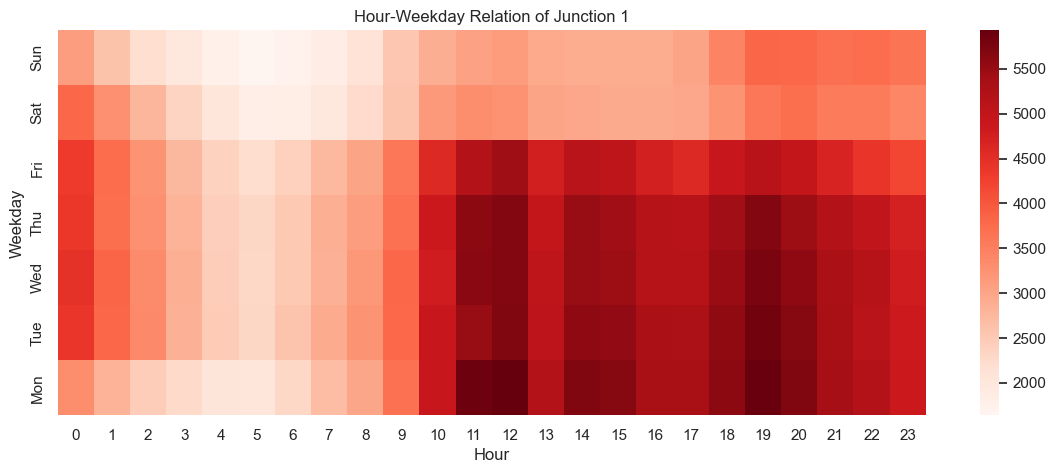

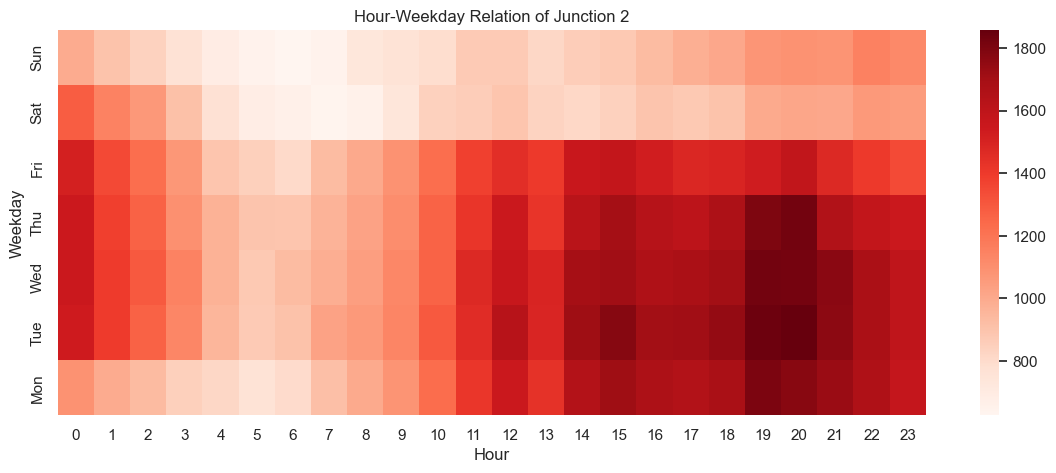

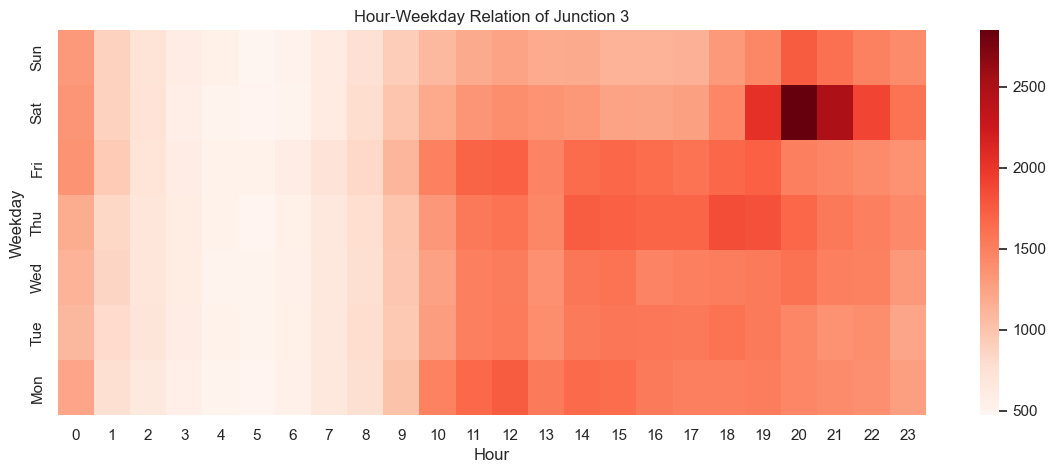

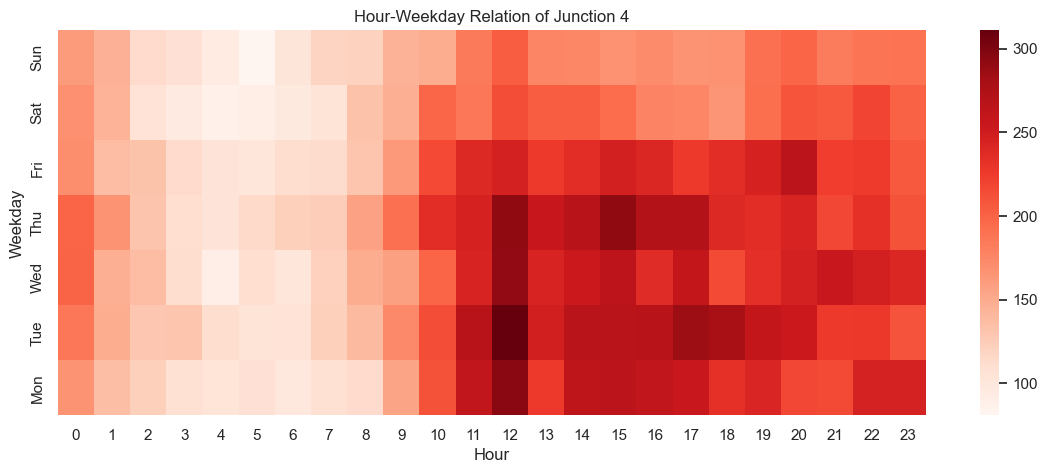

In [185]:
for i,j in enumerate(junctions):
    junction_map = j[["Weekday","Hour","Vehicles"]]
    junction_map = junction_map.pivot_table(index='Weekday', columns='Hour', aggfunc=sum)
    Cols = range(24)
    Index = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    junction_map = pd.DataFrame(data=junction_map.to_numpy(),index=Index, columns=Cols)
    ax = sns.heatmap(junction_map,cmap="Reds")
    ax.set(xlabel='Hour', ylabel='Weekday')
    ax.set_title('Hour-Weekday Relation of Junction %d'%(i+1))
    ax.invert_yaxis()
    plt.show()

This visualization aims to examine the relationship between days of the week and hours.

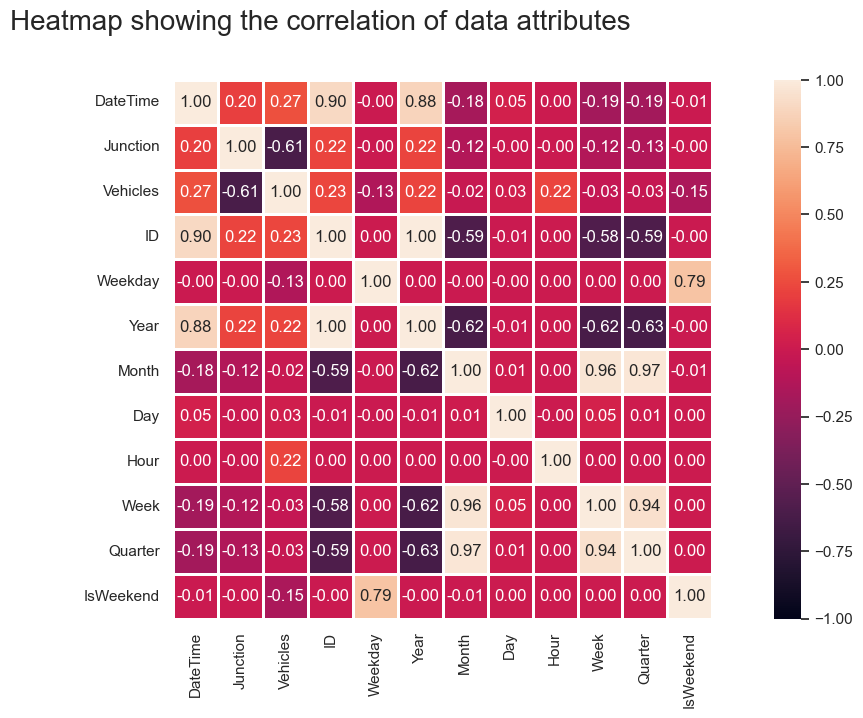

In [186]:
corr = data.corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

Heatmap about data attributes

The value closer to 1 or -1 is best correlation to each other.
As close as to -1, that pair of attribute is more negative correlation.
As close as to 1, that pair of attribute is more positive correlation.
As close as to 0, that pair of attribute is not correlating to each other.